In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.neural_network import MLPRegressor
from time import time
from sklearn.metrics import max_error, explained_variance_score, mean_tweedie_deviance
from sklearn.metrics import plot_confusion_matrix, mean_squared_error, mean_absolute_error

dtset = pd.read_csv("Match_preprocessed.csv")
dtset = dtset.drop('season', 1)
dtset = dtset.drop('date', 1)
dtset.shape

dummies = pd.get_dummies(dtset)
y = dummies.iloc[:,15]
X = dummies.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
print("Training MLPRegressor...")
tic = time()

#QuantileTransformer() - This method transforms the features to follow a uniform or a normal distribution

est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50,50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
predict = est.predict(X_test)
print("done in {:.3f}s".format(time() - tic))

#Let us take a naive approach by taking an average of all the points by thinking of a horizontal line through them
print("Test R2 score: {:.2f}".format(est.score(X_test, y_test)))
print("Max Error: ", max_error(y_test, predict))
print("Explained variance: ", explained_variance_score(y_test, predict))
print("Mean square error: ", mean_squared_error(y_test,predict))
print("Mean absolute error: ", mean_absolute_error(y_test,predict))


Training MLPRegressor...
done in 1.379s
Test R2 score: 0.22
Max Error:  7.795755932787552
Explained variance:  0.21862543324259787
Mean square error:  2.614565036505071
Mean absolute error:  1.2525452836441662


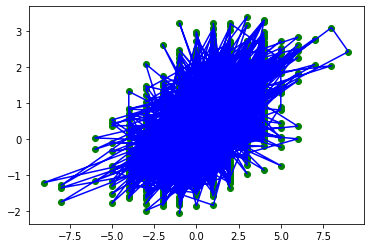

In [25]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predict,color='g')
plt.plot(y_test, predict,color='b')
plt.show()